HELLO WORLD

In [166]:
%%capture
%pip install scipy matplotlib


In [167]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

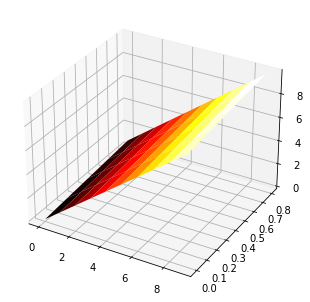

In [168]:
x = np.arange(0,10,1)
y = np.arange(0,1,0.2)

xs, ys = np.meshgrid(x, y)
# z = calculate_R(xs, ys)
zs = xs + ys

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
plt.show()

In [169]:

sample_rate, data = wavfile.read('sounds/Alesis-Fusion-Acoustic-Bass-C2.wav')
# data = stereo_data[0]
print(f"number of samples = {data.shape[0]}")
data

number of samples = 127782


<ipython-input-169-71a33e9aceaa>:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.



array([[-127, -145],
       [-126, -135],
       [-149, -176],
       ...,
       [   5,    0],
       [  -5,    2],
       [   2,   -4]], dtype=int16)

In [170]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')

sample len: 2.897551020408163s


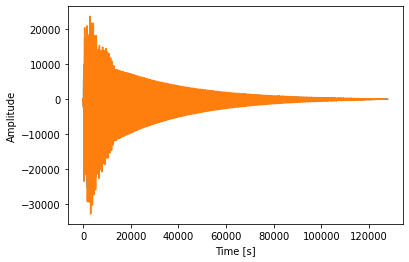

In [171]:
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")
pl.plot(data)

In [172]:
p = 20*np.log10(np.abs(np.fft.rfft(data[0:2048])))
f = np.linspace(0, sample_rate/2.0, len(p))


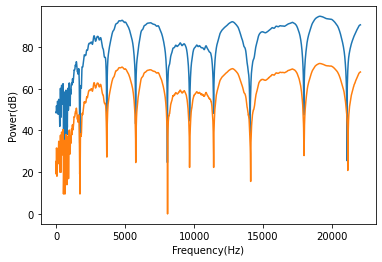

In [173]:
pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.plot(f, p)

In [174]:
full_fft_data = [20*np.log10(np.abs(np.fft.rfft(data[start_range:start_range + 2048])))
  for start_range in range(0, data.shape[0], 2048)]

print([arr.shape for arr in full_fft_data])

#
padded = [np.pad(arr, (0, full_fft_data[0].shape[0] - arr.shape[0])) for arr in full_fft_data]

stack = np.stack(padded)
pl.plot(stack)
;

[(2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (2048, 2), (806, 2)]


<ipython-input-174-8f9130c767c6>:1: RuntimeWarning:

divide by zero encountered in log10



ValueError: all input arrays must have the same shape

In [ ]:
ax = Axes3D(fig)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, stack, rstride=1, cstride=1, cmap='hot')